In [1]:
#Yui Lo 8-929-854 yui.lo@utp.ac.pa 1IL151

#Problema 1
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier ### Random Forest
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression ### Regresión logística
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier ### K vecino cercano
from sklearn.neural_network import MLPClassifier ### Perceptrones
from sklearn.svm import SVC ### Support Vector Machines
from sklearn.datasets import load_wine
# Carga y división del dataset
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=11)
# Instacia de Clasificadores/Estimadores
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
mlp_clf = MLPClassifier(hidden_layer_sizes=(128,64,32,16), random_state=1, activation='relu', max_iter=200)
svm_clf = svclassifier=SVC(kernel='poly', degree=3, gamma='auto')
# Definición y entrenamiento del estimador
voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('rf', rnd_clf),
                                          ('knn', knn_clf),
                                          ('mlp', mlp_clf),
                                          ('svm', svm_clf)],
                              voting='hard')
voting_clf.fit(X_train, y_train)
# Impresión de los accuracies individuales
for clf in (log_clf, rnd_clf, knn_clf, mlp_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__}, {accuracy_score(y_test, y_pred):.2%}')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


LogisticRegression, 97.78%
RandomForestClassifier, 97.78%
KNeighborsClassifier, 77.78%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier, 97.78%
SVC, 95.56%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VotingClassifier, 95.56%


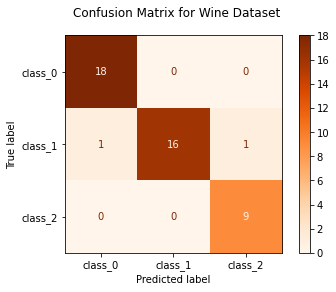

In [2]:
# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Crear matriz de confusión
fig=ConfusionMatrixDisplay.from_estimator(clf, X_test,
                                          y_test,display_labels=wine.target_names,
                                          cmap="Oranges")
fig.figure_.suptitle("Confusion Matrix for Wine Dataset")
plt.show()

In [3]:
#Problema 2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
# Carga y modificar el dataset
ford = pd.read_csv('/content/drive/MyDrive/ML/datasets/ford.csv')
''' Probando...
ford.describe()
ford.columns
ford.info()
ford.groupby(['transmission']).mean()
pd.unique(ford['model'])'''
ford['transmission'].replace(['Automatic','Manual','Semi-Auto'],
                             [1,2,3],inplace=True)
ford['fuelType'].replace(['Diesel','Electric','Hybrid','Other','Petrol'],
                             [1,2,3,4,5],inplace=True)
ford['model'].replace([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'],
                             [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,2],inplace=True)
# División del dataset
X=np.array(ford.drop(['price'],1),dtype=np.int64)
y=np.array(ford['price'])
# Modificar dimensión de y a 2d
y=y.reshape(-1,1)
# Escala estandar
X = StandardScaler().fit_transform(X)
# Dato de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
# MLP regressor
mlp = MLPRegressor(random_state=1, hidden_layer_sizes=(128, 128, 64), max_iter=1000).fit(X_train, y_train)
r2mlp=f"{mlp.score(X_test,y_test)}"
# SVM regressor
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
r2svm=f"{svm.score(X_test,y_test)}"
# Impresión R2
table=[["R2 de MLP", r2mlp],["R2 de SVM", r2svm]]
print(tabulate(table))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------  --------
R2 de MLP  0.914887
R2 de SVM  0.727253
---------  --------


In [5]:
#Parte 3
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.data_table import DataTable
from sklearn.ensemble import RandomForestClassifier ### Random Forest
from sklearn.linear_model import LogisticRegression ### Regresión logística
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier ### K vecino cercano
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
DataTable.max_columns = 35
# Carga y modificar el dataset
datefruit = pd.read_csv('/content/drive/MyDrive/ML/datasets/Date_Fruit_Datasets.csv')
datefruit['Class'].replace(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
                             [1,2,3,4,5,6,7],inplace=True)
# División del dataset
X=np.array(datefruit.drop(['Class'],1),dtype=np.float64)
y=np.array(datefruit['Class'])
# Modificar dimensión de y a 2d
y=y.reshape(-1,1)
# Escala estandar
X = StandardScaler().fit_transform(X)
# Dato de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
# Entrenamiento Regresión logistica
log = LogisticRegression(max_iter=700)
log.fit(X_train,y_train)
log_acc=f"{log.score(X_test,y_test):.2%}" #accuracy de regresión logística
# Entrenamiento Random forest
rnd = RandomForestClassifier(n_estimators=10, random_state=42)
rnd.fit(X_train,y_train)
rnd_acc=f"{rnd.score(X_test,y_test):.2%}" #accuracy de random forest
# Entrenamiento KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_acc=f"{knn.score(X_test,y_test):.2%}" #accuracy de KNN
# Impresión accuracy
accuracy=[["LogisticRegression", log_acc],["RandomForest", rnd_acc],["KNeighbors", knn_acc]]
print(tabulate(accuracy))

------------------  ------
LogisticRegression  91.11%
RandomForest        87.78%
KNeighbors          89.44%
------------------  ------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


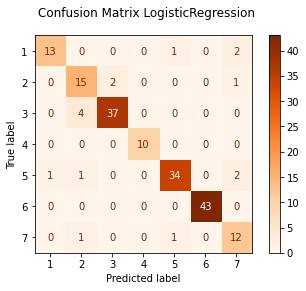

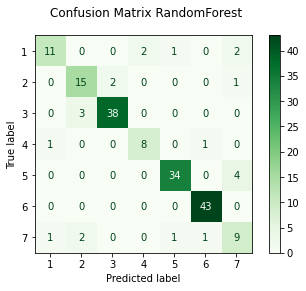

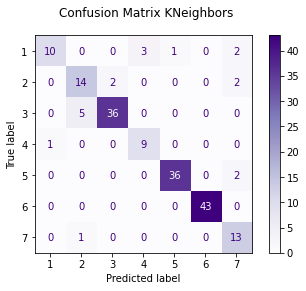

In [7]:
# Matriz de confusión 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Crear matriz de confusión de regresión logística
MxLog=ConfusionMatrixDisplay.from_estimator(log, X_test,
                                          y_test, display_labels=pd.unique(datefruit['Class']),
                                          cmap="Oranges")
MxLog.figure_.suptitle("Confusion Matrix LogisticRegression")
plt.show()
# Crear matriz de confusión de random forest
MxRnd=ConfusionMatrixDisplay.from_estimator(rnd, X_test,
                                          y_test, display_labels=pd.unique(datefruit['Class']),
                                          cmap="Greens")
MxRnd.figure_.suptitle("Confusion Matrix RandomForest")
plt.show()
# Crear matriz de confusión de KNeighbors
MxKnn=ConfusionMatrixDisplay.from_estimator(knn, X_test,
                                          y_test, display_labels=pd.unique(datefruit['Class']),
                                          cmap="Purples")
MxKnn.figure_.suptitle("Confusion Matrix KNeighbors")
plt.show()